<a href="https://colab.research.google.com/github/jonhyuk0922/Algorithm-Study-/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_DFS_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#그래프 탐색 알고리즘 : DFS/BFS

* 탐색(Search)이란 많은 양의 데이터 중에서 <strong>원하는 데이터를 찾는 과정</strong>을 말합니다.
* 대표적인 그래프 탐색 알고리즘으로는 DFS와 BFS가 있습니다.
* DFS/BFS는 코테에 매우 자주 등장합니다.

##1. 스택 자료구조

* 먼저 들어 온 데이터가 나중에 나가는 형싱(선입후출)의 자료구조입니다.
* <strong>입구와 출구가 동일한 형태</strong>로 스택을 시각화 할 수 있습니다.

In [1]:
stack = []

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(4)
stack.pop()

print(stack[::-1]) #최상단 원소부터 출력
print(stack) #최하단 원소부터 출력


[1, 3, 2, 5]
[5, 2, 3, 1]


##2. 큐 자료구조

* 먼저 들어 온 데이터가 먼저 나가는 형식(선입선출)의 자료구조입니다.
* 큐는 <strong>입구와 출구가 모두 뚫려있는 터널과 같은 형태</strong>로 시각화 할 수 있습니다.

In [4]:
from collections import deque

# 큐(Queue) 구현을 위해 deque 라이브러리 사용
queue = deque()

# 삽입(5) - 삽입(2) - 삽입(3) - 삽입(7) - 삭제() - 삽입(1) - 삽입(4) - 삭제()
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue) #먼저 들어온 순서대로 출력
queue.reverse()
print(queue) #나중에 들어온 순서대로 출력

deque([3, 7, 1, 4])
deque([4, 1, 7, 3])


##3.재귀함수

* 재귀함수(Recursive Function)란 자기 자신을 다시 호출하는 함수를 의미합니다.
* 단순한 형태의 재귀 함수 예재
  * '재귀 함수를 호출합니다.' 라는 문자열을 무한히 출력합니다.
  * 어느 정도 출력하다가 최대 재귀 깊이 초과 메시지가 출력됩니다.

In [ ]:
def recursive_function():
  print('재귀 함수를 호출합니다.')
  recursive_function()

recursive_function()

###3-1. 재귀 함수의 종료 조건

* 재귀 함수를 문제 풀이에서 사용할 때는 재귀 함수의 종료 조건을 반드시 명시해야 합니다.
* 종료 조건을 제대로 명시하지 않으면 함수가 무한히 호출될 수 있습니다.
    * <strong>종료 조건</strong>을 포함한 재귀 함수 예제

In [ ]:
def recursive_function(i):
  #100번째 호출을 했을 때 종료되도록 종료 조건 명시
  if i == 100:
      return
  print(i,'번째 재귀함수에서', i+1, '번째 재귀함수를 호출합니다.')
  recursive_function(i+1)
  print(i, '번째 재귀함수를 종료합니다.')

recursive_function(1)

###3-2. 팩토리얼 구현 예제

*  n! = 1 * 2 * 3 * ... * (n-1) * n 
* 수학적으로 0! 과 1!의 값은 1입니다.

In [18]:
# 반복적으로 구현한 n!
def factorial_iterative(n):
  result = 1
  #1부터 n까지의 수를 차례대로 곱하기
  for i in range(1, n+1):
      result *= i
  return result

# 재귀적으로 구현한 n!
def factorial_recursive(n):
  if n <=1: #n 이 1 이하인 경우 1을 반환
      return 1
  #n! = n * (n-1)! 를 그대로 코드로 작성하기
  return n * factorial_recursive(n-1)

#각각의 방식으로 구현한 n! 출력(n = 5)
print('반복적으로 구현:', factorial_iterative(5))
print('재귀적으로 구현:', factorial_recursive(5))


반복적으로 구현: 120
재귀적으로 구현: 120


###3-3. 최대공약수 계산 (유글리트 호제법) 예제

*  <u> 두 개의 자연수에 대한 최대공약수 </u>를 구하는 대표적인 알고리즘으로는 유클리드 호제법이 있습니다.
* <strong>유클리드 호제법</strong>
    * 두 자연수 A,B에 대하여 (A>B) A를 B로 나눈 나머지를 R이라고 합시다.
    * 이 때 A와 B의 최대공약수는 B와 R의 최대공약수와 같습니다.
* 유클리드 호제법의 아이디어를 그대로 재귀 함수로 작성할 수 있습니다.
    * <strong>예시:</strong> GCD(192,162)
    
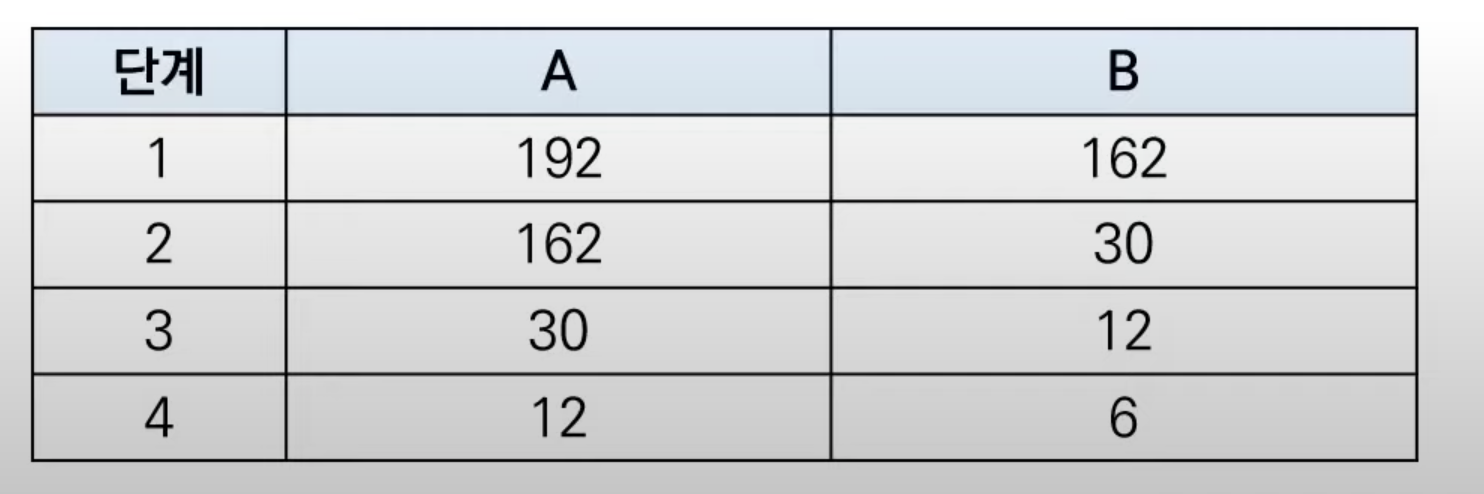


In [20]:
def gcd(a,b):
    if a % b == 0:
        return b
    else:
        return gcd(b, a%b)
        
print(gcd(192,162))

6


##4. DFS(Depth-First Search)

* DFS는 <strong> 깊이 우선 탐색 </strong>이라고 부르며 그래프에서 <strong>깊은 부분을 우선적으로 탐색하는 알고리즘</strong>입니다.
* DFS는 <strong> 스택 자료구조(혹은 재귀 함수)를 이용</strong>하며, 구체적인 동작 과정은 다음과 같습니다.
    1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 합니다.
    2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면, 그 노드를 스택에 넣고 방문 처리합니다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼냅니다.
    3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복합니다.

In [21]:
# DFS 메서드 정의
def dfs(graph, v, visited):
    #현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    #현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)
#각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
         [],
         [2,3,8],
         [1,7],
         [1,4,5],
         [3,5],
         [3,4],
         [7],
         [2,6,8],
         [1,7]
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9

#정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 